In [1]:
#Importing required libaries for code to run

%matplotlib notebook

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from cartopy.feature import ShapelyFeature
import cartopy.feature as cf
import cartopy.crs as ccrs
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from shapely.geometry import Point, LineString, Polygon


plt.ion() # makes the plotting of the map interactive

# generate matplotlib handles to create a legend of the features we put in our map.
def generate_handles(labels, colors, edge='k', alpha=1):
    lc = len(colors)  # get the length of the color list
    handles = []
    for i in range(len(labels)):
        handles.append(mpatches.Rectangle((0, 0), 1, 1, facecolor=colors[i % lc], edgecolor=edge, alpha=alpha))
    return handles

# create a scale bar of length 20 km in the upper right corner of the map
def scale_bar(ax, location=(0.92, 0.95)):
    llx0, llx1, lly0, lly1 = ax.get_extent(ccrs.PlateCarree())
    sbllx = (llx1 + llx0) / 2
    sblly = lly0 + (lly1 - lly0) * location[1]

    tmc = ccrs.TransverseMercator(sbllx, sblly)
    x0, x1, y0, y1 = ax.get_extent(tmc)
    sbx = x0 + (x1 - x0) * location[0]
    sby = y0 + (y1 - y0) * location[1]

    plt.plot([sbx, sbx - 20000], [sby, sby], color='k', linewidth=9, transform=tmc)
    plt.plot([sbx, sbx - 10000], [sby, sby], color='k', linewidth=6, transform=tmc)
    plt.plot([sbx-10000, sbx - 20000], [sby, sby], color='w', linewidth=6, transform=tmc)

    plt.text(sbx, sby-4500, '20 km', transform=tmc, fontsize=8)
    plt.text(sbx-12500, sby-4500, '10 km', transform=tmc, fontsize=8)
    plt.text(sbx-24500, sby-4500, '0 km', transform=tmc, fontsize=8)
    
#Create variable for open spaces dataset and load data

openspace_data = gpd.read_file(r'C:\Users\angel\Programming\Project\Data\NS_GreenspaceSite.shp')

#Create variable for boundary dataset and load data, this example uses Glasgow as an area of interest

boundary_data = gpd.read_file(r'C:\Users\angel\Programming\Project\Data\GlasgowBoundary.shp')

#Create variable for roads dataset and load data

road_data = gpd.read_file(r'C:\Users\angel\Programming\Project\Data\NS_RoadLink.shp')


In [2]:
#display open space dataset table

openspace_data

,id,function,distName1,distName2,distName3,distName4,geometry
0,B9FB5BAD-D06B-5E80-E053-A03BA40A915F,Religious Grounds,Cumlodden Parish Church,None,None,None,"POLYGON Z ((201510.100 699637.390 0.000, 20146..."
1,B9FB5BAD-D08B-5E80-E053-A03BA40A915F,Playing Field,None,None,None,None,"POLYGON Z ((202285.600 699980.300 0.000, 20237..."
2,B9FB5B8A-4527-5E80-E053-A03BA40A915F,Play Space,None,None,None,None,"POLYGON Z ((295757.140 697393.170 0.000, 29577..."
3,B9FB5B8A-453B-5E80-E053-A03BA40A915F,Playing Field,None,None,None,None,"POLYGON Z ((296531.130 697756.960 0.000, 29653..."
4,B9FB5B55-D330-5E80-E053-A03BA40A915F,Cemetery,None,None,None,None,"POLYGON Z ((296740.640 697734.620 0.000, 29672..."
...,...,...,...,...,...,...,...
6513,B9FB5B7C-44F7-5E80-E053-A03BA40A915F,Bowling Green,None,None,None,None,"POLYGON Z ((297947.770 631156.450 0.000, 29797..."
6514,B9FB5B7C-7D9F-5E80-E053-A03BA40A915F,Cemetery,None,None,None,None,"POLYGON Z ((285450.820 605668.780 0.000, 28545..."
6515,B9FB5B7C-8031-5E80-E053-A03BA40A915F,Play Space,None,None,None,None,"POLYGON Z ((288403.480 604139.460 0.000, 28841..."
6516,B9FB5B7C-8073-5E80-E053-A03BA40A915F,Cemetery,None,None,None,None,"POLYGON Z ((289341.340 603559.180 0.000, 28934..."


In [3]:
#Display Boundary dataset table

boundary_data

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,None,NCP,Non-Civil Parish or Community,GLASGOW_CITY,9114.0,9114.0,0.0,0.0,None,17635.598,173.468,FA,FILLER AREA,None,None,"POLYGON ((251394.803 672325.598, 251426.299 67..."


In [4]:
#Display road dataset table 

road_data

,fictitious,identifier,class,roadNumber,name1,name1_lang,name2,name2_lang,formOfWay,length,primary,trunkRoad,loop,startNode,endNode,structure,nameTOID,numberTOID,function,geometry
0,false,06A19770-70B6-4D3D-938C-C6085728F028,Unclassified,None,Riccarton Road,None,None,None,Single Carriageway,45,false,false,false,A4693352-CD11-42D3-B1BC-EDBE47BFCC12,137D16B4-CE3A-4DBC-87E3-EE0B18D35551,None,osgb4000000006296591,None,Local Road,"LINESTRING Z (299998.000 676234.000 0.000, 299..."
1,false,F882F983-E302-4F93-83E5-E80C3B3E64A3,Unclassified,None,Riccarton Road,None,None,None,Single Carriageway,245,false,false,false,D82F5C76-F78A-4821-AE72-75BE8B55FF75,A4693352-CD11-42D3-B1BC-EDBE47BFCC12,None,osgb4000000006296591,None,Local Road,"LINESTRING Z (300043.000 676285.000 0.000, 300..."
2,false,5D9E78E8-CF94-4487-897A-125E80083410,Unclassified,None,Priory Road,None,None,None,Single Carriageway,40,false,false,false,6866CFFA-B9E7-4F06-9A53-6F4293B5779D,B7642B8B-1B59-44D9-A2FE-6ADFE3E8D79D,None,osgb4000000006299257,None,Local Road,"LINESTRING Z (299994.000 676536.000 0.000, 300..."
3,false,63A37C06-653E-416A-9B7D-60AD26141801,Unclassified,None,None,None,None,None,Single Carriageway,65,false,false,false,69039E82-2C4A-4102-AF23-D35C03A6CF7B,D74DF285-064F-4D98-AB93-8CB39CCAAB32,None,None,None,Local Road,"LINESTRING Z (299985.040 676555.080 0.000, 300..."
4,false,747DF7BC-150C-4AAE-B408-132EBA7CA067,Unclassified,None,Burgess Hill,None,None,None,Single Carriageway,135,false,false,false,F002EB34-73CF-4FFB-88C2-C4321B3AF97F,9A9ED85E-68E5-4C2E-855A-731AB34FA23A,None,osgb4000000006303062,None,Local Road,"LINESTRING Z (299976.160 676643.720 0.000, 300..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152540,false,25B8E38D-04E2-49EE-959F-409AECD82DB0,Not Classified,None,None,None,None,None,Single Carriageway,40,false,false,false,E5BB11CB-9A88-4FD9-8487-39132547E903,AA897CB2-71A9-405B-88FF-721B6F633AC4,None,None,None,Restricted Local Access Road,"LINESTRING Z (200756.570 635276.790 0.000, 200..."
152541,false,31E1ABA4-7D87-4E64-99E6-DE2917EA59DC,Unknown,None,None,None,None,None,Single Carriageway,70,false,false,false,CDCC319B-BAE4-4315-8D19-54B68E006212,611E0D98-FC98-41A6-8094-175FF3945AC2,None,None,None,Restricted Local Access Road,"LINESTRING Z (200782.630 635400.440 0.000, 200..."
152542,false,A26FC743-9B1C-40A1-AB85-FE51E48AD5D7,Unknown,None,None,None,None,None,Single Carriageway,107,false,false,false,5A581E30-7834-4C74-9B5B-E5D23D948F37,CDCC319B-BAE4-4315-8D19-54B68E006212,None,None,None,Restricted Local Access Road,"LINESTRING Z (200888.410 635418.760 0.000, 200..."
152543,false,83202DD7-9C66-4F0E-A47A-1A67CF899DED,Not Classified,None,None,None,None,None,Single Carriageway,52,false,false,false,AA897CB2-71A9-405B-88FF-721B6F633AC4,611E0D98-FC98-41A6-8094-175FF3945AC2,None,None,None,Local Road,"LINESTRING Z (200787.900 635301.770 0.000, 200..."


In [5]:
# Check co-ordinate reference systems for openspace layers

openspace_data.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [6]:
# Check co-ordinate reference systems for boundary layer

boundary_data.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [7]:
# Check co-ordinate reference systems for roads layer

road_data.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [8]:
#Clip the open space dataset to the extent of the project boundary layer, using geopandas clip function 

# Clip data
openspace_glasgow = gpd.clip(openspace_data, boundary_data)

# Ignore missing/empty geometries
openspace_glasgow = openspace_glasgow[~openspace_glasgow.is_empty]

#Print number of rows in new clipped dataset compared to original dataset. Ensures that clip has worked.
print("The clipped data has fewer polygons (represented by rows):",
      openspace_glasgow.shape, openspace_data.shape)

#export clipped open space dataset into ESRI shapefile into data folder

openspace_glasgow.to_file('C:\\Users\\angel\\Programming\\Project\\Data\\openspace_glasgow.shp', driver = 'ESRI Shapefile')


The clipped data has fewer polygons (represented by rows): (1079, 7) (6518, 7)


In [9]:
#Clip the roads dataset to the extent of the project boundary layer, using geopandas clip function 

# Clip data
road_glasgow = gpd.clip(road_data, boundary_data)

# Ignore missing/empty geometries
road_glasgow = road_glasgow[~road_glasgow.is_empty]

#Print number of rows in new clipped dataset compared to original dataset. Ensures that clip has worked.
print("The clipped data has fewer line sections (represented by rows):",
      road_glasgow.shape, road_data.shape)

#export clipped road dataset into ESRI Shapefile into data folder

road_glasgow.to_file('C:\\Users\\angel\\Programming\\Project\\Data\\road_glasgow.shp', driver = 'ESRI Shapefile')


The clipped data has fewer line sections (represented by rows): (23788, 20) (152545, 20)


In [10]:
# identify the number of open space functions in the dataset to identify how many colours are required for symboloisation 
num_openspace = len(openspace_glasgow.function.unique())
print('Number of unique Open Space Types: {}'.format(num_openspace))
print(openspace_glasgow['function'].unique())

Number of unique Open Space Types: 10
['Public Park Or Garden' 'Play Space' 'Religious Grounds'
 'Other Sports Facility' 'Playing Field' 'Bowling Green' 'Tennis Court'
 'Golf Course' 'Allotments Or Community Growing Spaces' 'Cemetery']


In [11]:
# Identify the number of unique road types in the roads datasetto identify how many colours are required for symboloisation 
num_road = len(road_glasgow.function.unique())
print('Number of unique road classes: {}'.format(num_road)) 

Number of unique road classes: 8


<IPython.core.display.Javascript object>


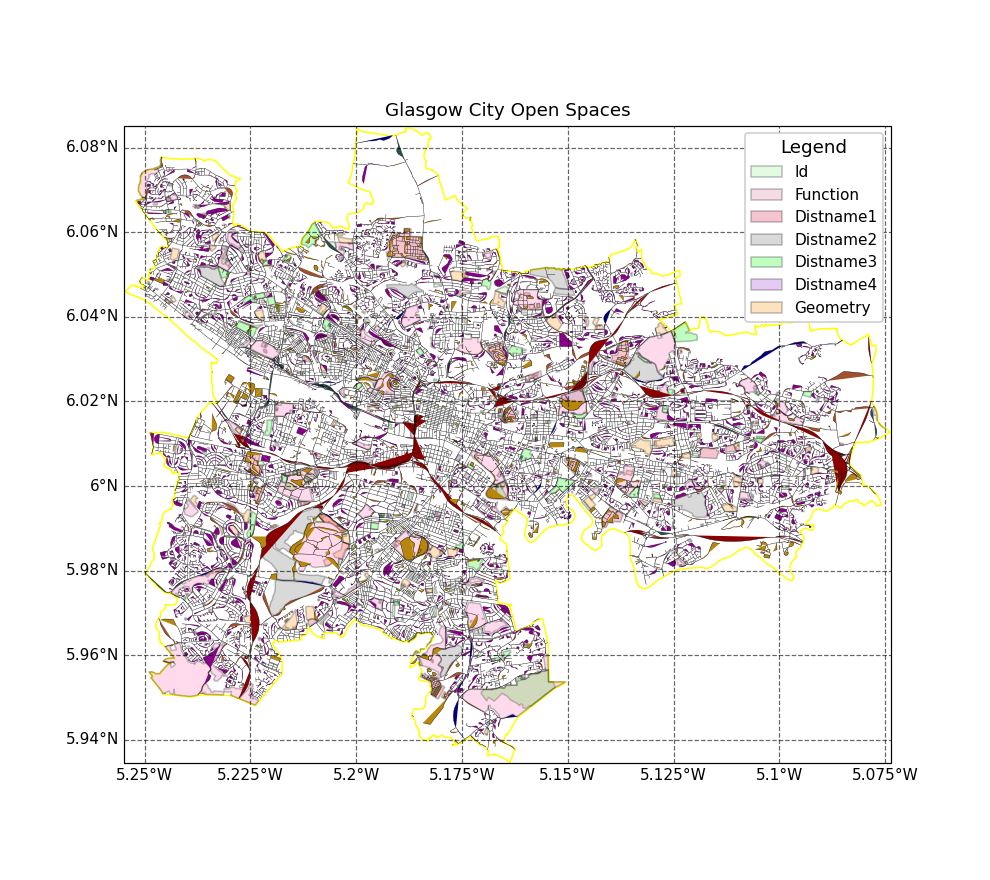

In [12]:
myFig = plt.figure(figsize=(9, 8))  # create a figure of size 9x8 inchs

myCRS = ccrs.UTM(30)  #assign the UTM for scotland on to the figure.

ax = plt.axes(projection=ccrs.Mercator())  # finally, create an axes object in the figure, using a Mercator
# projection, where we can actually plot our data.

In [13]:
# adding the outline of Glasgow City Boundary using cartopy's ShapelyFeature
outline_feature = ShapelyFeature(boundary_data['geometry'], myCRS, edgecolor='yellow', facecolor='w')
xmin, ymin, xmax, ymax = boundary_data.total_bounds
ax.add_feature(outline_feature) # add the boundary feature to the map

# using the boundary of the shapefile features, zoom the map to our area of interest
ax.set_extent([xmin, xmax, ymin, ymax], crs=myCRS) 

#add gridlines to the map, turning off the top and rightside labels 
gridlines = ax.gridlines(draw_labels=True, color='black', alpha=0.6, linestyle='--')
gridlines.right_labels =False # turn off the right side labels
gridlines.top_labels =False # turn off the top labels

plt.title('Glasgow City Open Spaces')


Text(0.5, 1.0, 'Glasgow City Open Spaces')

In [14]:
#create colours for the open space types - for this dataset 10 colours need to be identified

openspace_colors = ['lightgreen','palevioletred', 'crimson', 'dimgrey', 'lime', 'darkorchid', 'darkorange', 'hotpink', 'indigo', 'aqua'  ]

# get a list of unique names for the Open Space type

openspace_types = list(openspace_glasgow.function.unique())

# sort the open space types alphabetically by name
openspace_types.sort() 

# add the open spaces data to the map

for i, openspace in enumerate(openspace_types):
    feat = ShapelyFeature(openspace_glasgow['geometry'][openspace_glasgow['function'] == openspace], myCRS, 
                          edgecolor='black',
                          facecolor=openspace_colors[i],
                          linewidth=1,
                          alpha=0.25)
    ax.add_feature(feat)


<IPython.core.display.Javascript object>


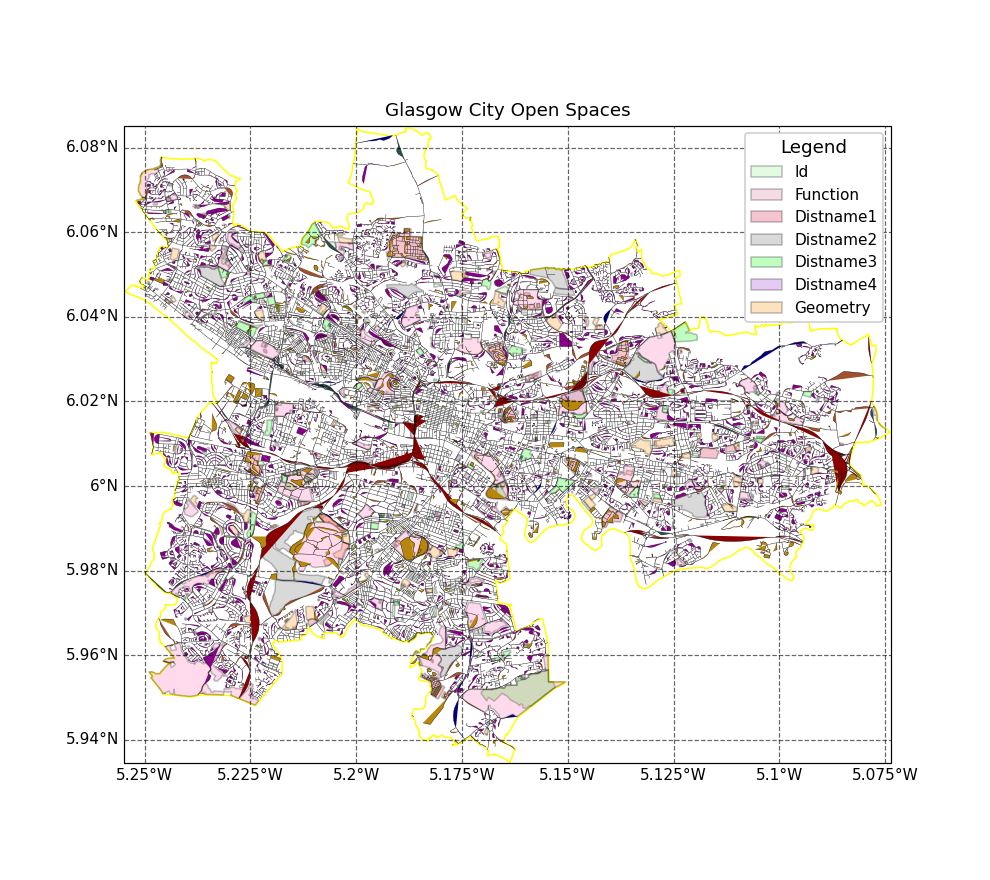

In [15]:
#add roads layer to map 

road_colors = ['darkslategrey', 'navy', 'silver', 'darkmagenta', 'sienna', 'darkred', 'darkgoldenrod', 'olive']

# get a list of unique road types from the function attribute for the roads dataset

road_types = list(road_glasgow.function.unique())

# sort the open space types alphabetically by name
road_types.sort() 

# add the road data to the map

for i, road in enumerate(road_types):
    road_feat = ShapelyFeature(road_glasgow['geometry'][road_glasgow['function'] == road], myCRS, 
                            edgecolor='black',
                            facecolor=road_colors[i],
                            linewidth=0.25)
    ax.add_feature(road_feat)
    
myFig # to show the updated figure

<IPython.core.display.Javascript object>


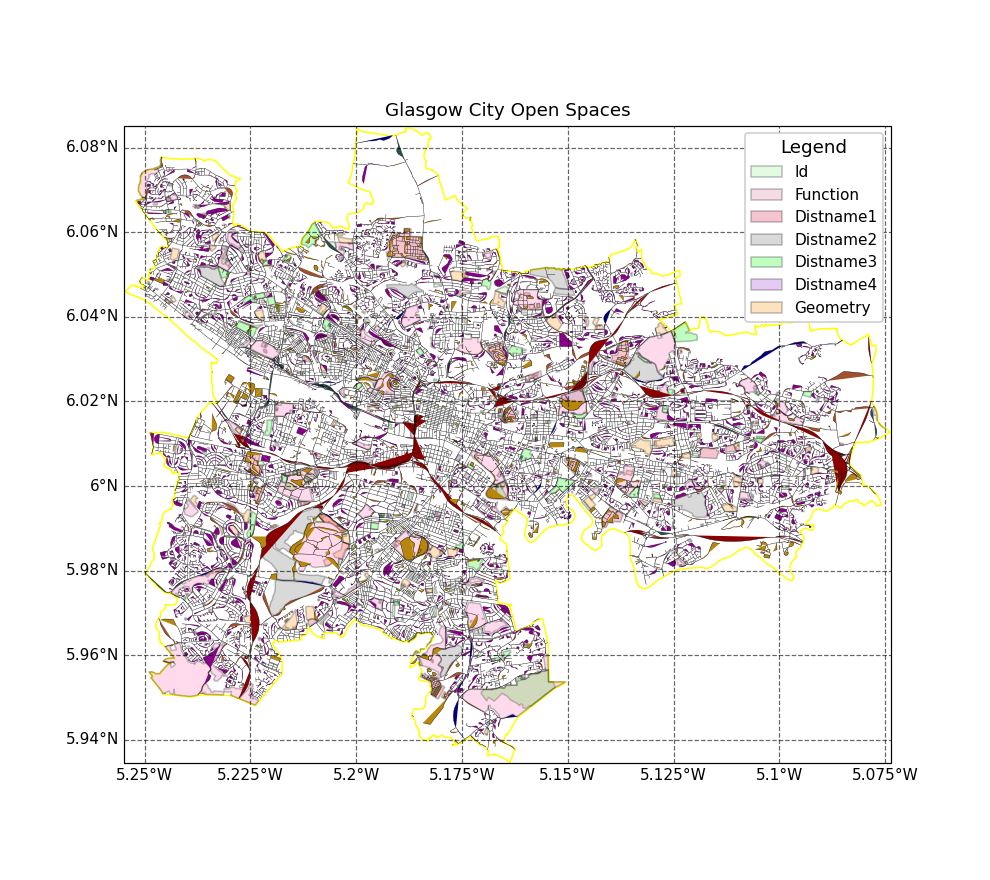

In [16]:
# generate a list of handles for the openspace dataset
openspace_handles = generate_handles(openspace_glasgow.function.unique(), openspace_colors, alpha=0.25)

#  generate a list of handles for the road dataset
#road_handles = generate_handles(road_glasgow.function.unique(), road_colors, alpha=0.25)

# note: if you change the color you use to display rivers, you'll want to change it here, too
#boundary_handle = [mpoly.poly2D([], [], edgecolor='yellow', facecolor='w)]

# update county_names to take it out of uppercase text
openspace_types = [function.title() for function in openspace_glasgow]
                                
# update county_names to take it out of uppercase text
#road_names = [function.title() for function in road_glasgow]

#ax.legend() takes a list of handles and a list of labels corresponding to the objects you want to add to the legend
handles = openspace_handles #+ road_handles
                                
labels = openspace_types #+ road_names 

leg = ax.legend(handles, labels, title='Legend', title_fontsize=12, 
                 fontsize=10, loc='upper right', frameon=True, framealpha=1)

myFig # to show the updated figure